In [75]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

from tensorflow import keras

from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout, TimeDistributed
from keras import Sequential

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv("sign_mnist_train.csv")

In [5]:
test_df = pd.read_csv("sign_mnist_test.csv")

In [6]:
train_labels = train_df.label

In [7]:
test_labels = test_df.label

In [8]:
#test_images = test_df.loc[:, test_df.columns != 'label']
test_images = test_df.drop(['label'], axis = 1)

In [9]:
print(test_images.head)

<bound method NDFrame.head of       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        149     149     150     150     150     151     151     150     151   
1        126     128     131     132     133     134     135     135     136   
2         85      88      92      96     105     123     135     143     147   
3        203     205     207     206     207     209     210     209     210   
4        188     191     193     195     199     201     202     203     203   
5         72      79      87     101     115     124     131     135     139   
6         93     100     112     118     123     127     131     133     136   
7        177     177     177     177     177     178     179     179     178   
8        191     194     196     198     201     203     204     205     205   
9        171     172     172     173     173     173     173     173     172   
10       212     212     213     212     214     213     213     213     214   
11       1

In [10]:
train_images = train_df.drop(['label'], axis = 1)

In [11]:
print(train_images.tail)

<bound method NDFrame.tail of        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         107     118     127     134     139     143     146     150     153   
1         155     157     156     156     156     157     156     158     158   
2         187     188     188     187     187     186     187     188     187   
3         211     211     212     212     211     210     211     210     210   
4         164     167     170     172     176     179     180     184     185   
5         161     168     172     173     178     184     189     193     196   
6         134     134     135     135     136     137     137     138     138   
7         114      42      74      99     104     109     117     127     142   
8         169     174     176     180     183     185     187     188     190   
9         189     189     189     190     190     191     190     190     190   
10        133     135     141     146     150     155     158     159     163  

In [12]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [13]:
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [14]:
print(len(train_images))

27455


In [15]:
def convertTo2d(row):
    count = 0
    newArray = np.ndarray(shape=(28,28), dtype=float, order='F')
    for i in range(0, 28):
        for j in range(0,28):
            newArray[i][j] = row[count]
            count += 1
    return newArray

def convertAll(df):
    numRow = len(df)
    arrayOfImages = np.ndarray(shape= (numRow, 28, 28), dtype=float, order='F')
    for i in range(0, numRow):
        arrayOfImages[i] = (convertTo2d(df.loc[i]))
    return arrayOfImages
        

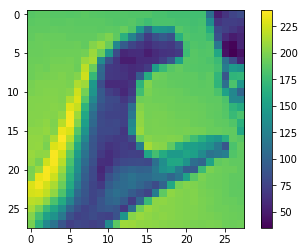

In [16]:
plt.figure()
plt.imshow(convertTo2d(train_images.loc[2]))
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

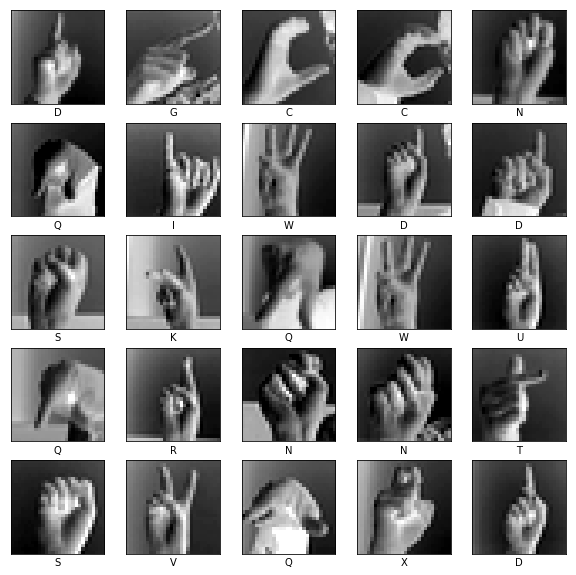

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(convertTo2d(train_images.loc[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels.loc[i]])
plt.show()

In [204]:
#'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
#model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
'''
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
'''
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_51 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_52 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 128)       

In [205]:
formatted_train_images = train_images.to_numpy()

In [206]:
formatted_test_images = test_images.to_numpy()

In [207]:
formatted_train_images = formatted_train_images.reshape(formatted_train_images.shape[0],28,28,1)
formatted_test_images = formatted_test_images.reshape(formatted_test_images.shape[0],28,28,1)

In [208]:
print(formatted_test_images.shape)

(7172, 28, 28, 1)


In [209]:
history = model.fit(formatted_train_images, train_labels, validation_split=0.1, epochs=12)

Train on 24709 samples, validate on 2746 samples
Epoch 1/12
24709/24709 [==============================] - 27s 1ms/step - loss: 1.4257 - acc: 0.5531 - val_loss: 0.5138 - val_acc: 0.9366
Epoch 2/12
24709/24709 [==============================] - 26s 1ms/step - loss: 0.2679 - acc: 0.9065 - val_loss: 0.1691 - val_acc: 0.9818
Epoch 3/12
24709/24709 [==============================] - 27s 1ms/step - loss: 0.1236 - acc: 0.9586 - val_loss: 0.0451 - val_acc: 0.9975
Epoch 4/12
24709/24709 [==============================] - 27s 1ms/step - loss: 0.0753 - acc: 0.9740 - val_loss: 0.0340 - val_acc: 0.9982
Epoch 5/12
24709/24709 [==============================] - 27s 1ms/step - loss: 0.0544 - acc: 0.9822 - val_loss: 0.0172 - val_acc: 1.0000
Epoch 6/12
24709/24709 [==============================] - 27s 1ms/step - loss: 0.0473 - acc: 0.9839 - val_loss: 0.0141 - val_acc: 1.0000
Epoch 7/12
24709/24709 [==============================] - 27s 1ms/step - loss: 0.0395 - acc: 0.9873 - val_loss: 0.0089 - val_acc:

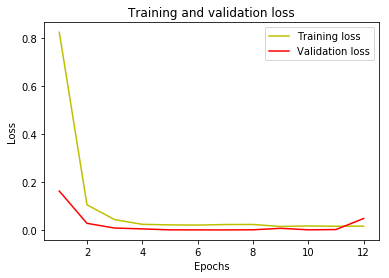

In [201]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

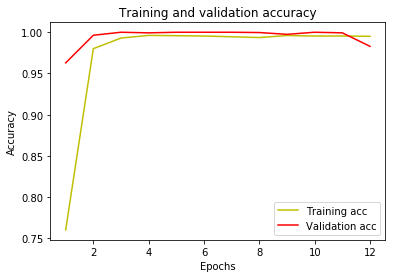

In [202]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [203]:
test_loss, test_acc = model.evaluate(formatted_test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

Test accuracy: 0.8588957190513611
Test Loss: 0.4953373937352835


In [102]:
predictions = model.predict(formatted_test_images)

In [103]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(26))
  plt.yticks([])
  thisplot = plt.bar(range(26), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

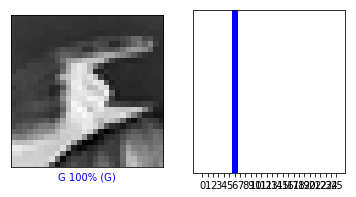

In [104]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, formatted_test_images.reshape(formatted_test_images.shape[0], 28, 28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

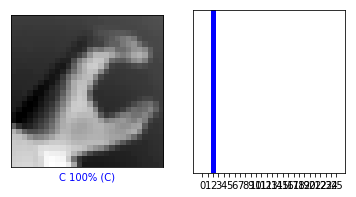

In [105]:
i = 6999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, formatted_test_images.reshape(formatted_test_images.shape[0], 28, 28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

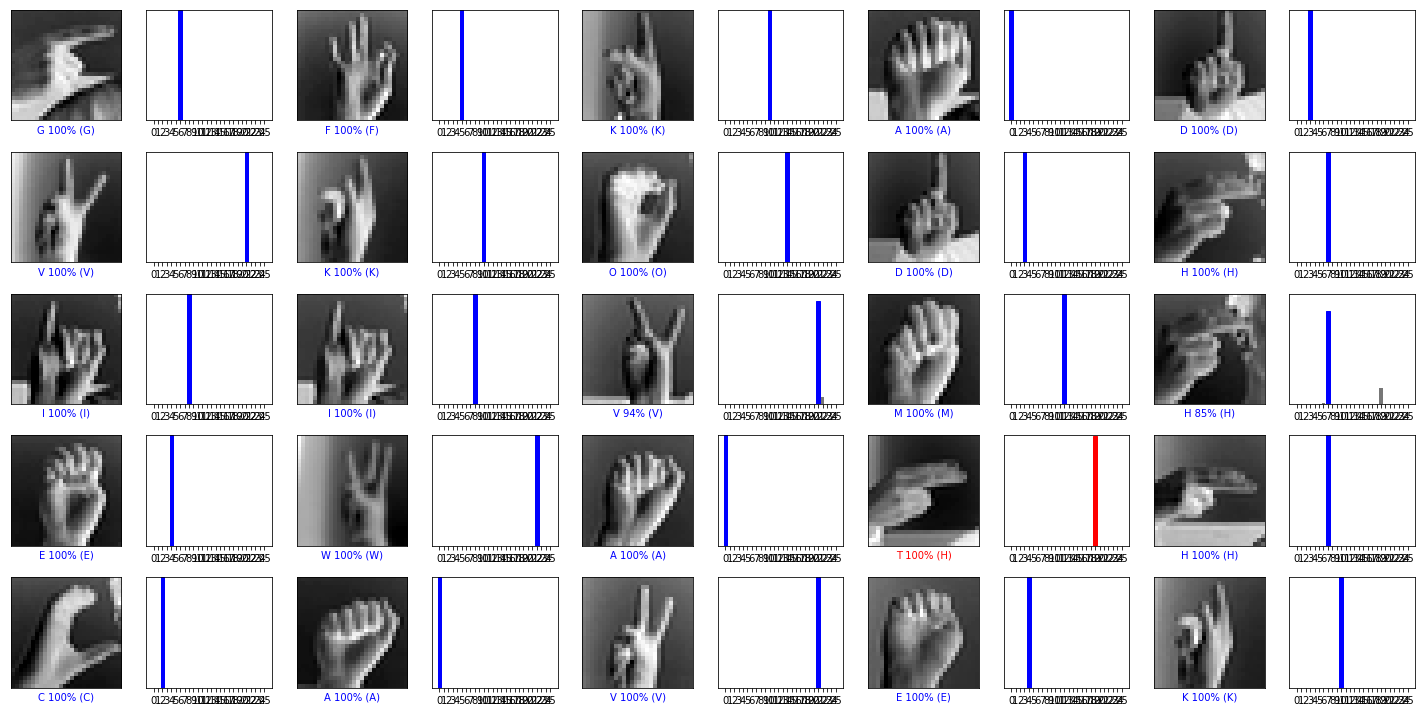

In [106]:
#Plot the first X test images, their predicted labels, and the true labels.
#Color correct predictions in blue and ncorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, formatted_test_images.reshape(formatted_test_images.shape[0], 28, 28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [246]:
model.save("test.h5")